In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Latex

In [2]:
init_printing(use_latex='mathjax')#(use_latex=True)

In [3]:
def hprint(header, obj):
    display(Latex(r"$" + header +latex(obj)+r"$") )
    
def lprint(latex_str, *elements):
    s = latex_str
    for i, e in enumerate(elements):        
        s = s.replace(f"{{{i}}}", r"$" + e +r"$")
    display(Latex(s))

#### Define a list of parameters

In [4]:
A, B, D_u, D_v, u, v = symbols('A, B, D_u, D_v, u, v', real=True)
k = symbols('k', integer=True)

> The Brusselator PDEs are as follows

<h3><center>$\partial_t u = D_u (\partial_x^2 + \partial_y^2)u + A - (B+1)u + u^2v$</center></h3>

<h3><center>$\partial_t v = D_v (\partial_x^2 + \partial_y^2)v + Bu - u^2 v$</center></h3>
Then, we define kinetic terms as

<h3><center>$f(u,v) = A - (B+1)u + u^2v$</center></h3>
<h3><center>$g(u,v) = Bu - u^2 v$</center></h3>

In [5]:
f = A - (B + 1) * u + u**2 * v
g = B * u - u**2 * v
hprint("f(u,v) = ", f)
hprint("g(u,v) = ",g)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### which as a vector, we can define it like

In [200]:
Kinetic = Matrix([[f], [g]])
hprint(r"\boldsymbol{f}(u, v) = ", Kinetic)

<IPython.core.display.Latex object>

#### First, we find the fix points of the system without diffusion. 

<center>$f(u,v) = A - (B+1)u + u^2v = 0$</center>
<center>$g(u,v) = Bu - u^2 v = 0$</center>

The solution of the above system finds $u^*$ and $v^*$ such that
<center>$f(u^*, v^*) = 0$</center>
<center>$g(u^*, v^*) = 0$</center>
which are

In [201]:
u_star, v_star = solve(Kinetic, (u, v))[0]
hprint("u^* = ", u_star)
hprint("v^* = ", v_star)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### Next, to linearise the PDE system, we find the Jacobian of $(f, g)$ that evaluated at $(u^*, v^*)$ 

In [202]:
J = Kinetic.jacobian([u, v])
hprint(r"J= \frac{\partial \boldsymbol{f}_i}{\partial u_j} = ", J)
J = J.subs([(u, u_star), (v, v_star)])
hprint("J|_{(u^*, v^*)} =", J)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### And eigenvalues of the resulting matrix in terms of parameters $A$ and $B$ are

In [203]:
λ_1, λ_2 =  list(J.eigenvals().keys())
hprint("\lambda_1 = ", λ_1)
hprint("\lambda_2 = ", λ_2)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### However, remeber that the eigenvalues of a matrix $J$ is the solution of the quadratic equation

<center>$\lambda^2 - Tr(J) \lambda +  Det(J)  = 0$,</center>

#### such that its solutions writes as

<center>$\lambda_{1,2} = \frac{Tr(J)}{2} \pm \sqrt{ (\frac{Tr(J)}{2})^2 - Det(J) }$,</center>

where $Tr(J)$ and $Det(J)$ are trace and determinant of the matrix $J$, respectively.

In [204]:
hprint("Tr(J) = ", J.trace())
hprint("Det(J) = ", J.det())

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### If we define

<center>$C =\frac{Tr(J)}{2} = \frac{B-1-A^2}{2}$</center>

#### the quadratic equation becomes

<center>$\lambda^2 - 2C \lambda +  A^2  = 0 \qquad$, (I)</center>

#### and its solutions find as

<center>$\lambda_{1,2} = C \pm \sqrt{ C^2 - A^2 }$,</center>


In [205]:
#λ_star = J.trace()/2
C = symbols("C")
λ_1 = C - sqrt(C**2 - A**2)
λ_2 = C + sqrt(C**2 - A**2)
hprint("\lambda_1 = ", λ_1)
hprint("\lambda_2 = ", λ_2)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### And when we plot $f(\lambda) = \lambda^2 - 2C \lambda +  A^2 $ , we can see 

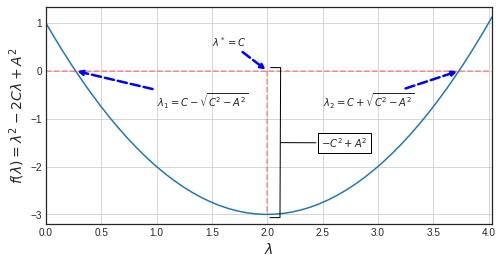

In [219]:


C_val = 2
A_val = 1
d = C_val**2 - A_val**2

xs = np.linspace(0, C_val+np.sqrt(d) + .3)
def f(λ, C, A):
    return λ**2 - 2 * C * λ + A**2

fig = plt.figure(figsize=(8,4))


ax = fig.add_subplot(111)

ax.annotate(r"$\lambda^* = C$", xy=(C_val, 0.0),
             xycoords='data',
             xytext=(1.5, 0.5),
             textcoords='data',
             arrowprops=dict(arrowstyle= '-|>',
                             color='blue',
                             lw=2.5,
                             ls='--')
           )

ax.annotate(r"$\lambda_1 = C - \sqrt{C^2 - A^2}$", xy=(C_val-np.sqrt(d), 0.0),
             xycoords='data',
             xytext=(1.0, -0.75),
             textcoords='data',
             arrowprops=dict(arrowstyle= '-|>',
                             color='blue',
                             lw=2.5,
                             ls='--')
           )

ax.annotate(r"$\lambda_2 = C + \sqrt{C^2 - A^2}$", xy=(C_val+np.sqrt(d), 0.0),
             xycoords='data',
             xytext=(2.5, -0.75),
             textcoords='data',
             arrowprops=dict(arrowstyle= '-|>',
                             color='blue',
                             lw=2.5,
                             ls='--')
           )

ax.annotate(r"$-C^2 + A^2$", xy=(C_val+.1, -1.5), 
            xytext=(C_val+.7, -1.65), 
            xycoords='data', 
            textcoords='data',
            ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=7.5, lengthB=1.0', lw=1.0))

plt.plot(xs, f(xs, C_val, A_val))
plt.hlines(0, 0, 4,'r', '--', alpha=.4)
plt.vlines(C_val, 0, -3,'r', '--', alpha=.4)
plt.xlabel(r"$\lambda$", fontsize=14)
plt.ylabel(r"$f(\lambda) = \lambda^2 - 2C \lambda +  A^2$", fontsize=14)
plt.xlim([0, np.max(xs)])

plt.grid()
plt.show()

#### the maximum is at $\lambda^* = C$ and equal to $f(\lambda^*) = f(C) = -C^2 + A^2$, eigenvalues are 
<center>$\lambda_1 = C - \sqrt{ C^2 - A^2 }$,</center>
<center>$\lambda_2 = C + \sqrt{ C^2 - A^2 }$,</center>

#### Having stable solution without diffusion is equivalent to say $\lambda_2 = C + \sqrt{C^2 - A^2} \le 0$

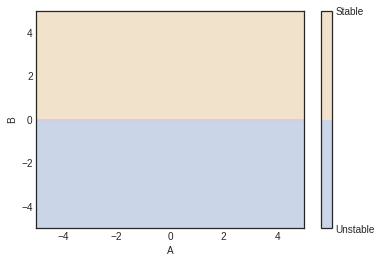

In [209]:
# Create a grid for C and A
L = 5
A_size = 200
C_size = 200
A_domain = L * np.linspace(-1, 1, A_size)
C_domain = L * np.linspace(-1, 1, C_size)
A_val, C_val = np.meshgrid(A_domain, C_domain, sparse=False, indexing="ij")

# Turn lambda_2 from symbolic function to a numeric function
λ_2_f = lambdify([A, C], λ_2, modules='numpy')
# Find lambda_2 values
domain = λ_2_f(np.complex64(A_val) , np.complex64(C_val))

stable = np.real(domain).copy()
stable[stable < 0] = -1
stable[stable > 0] = 0
plt.style.use('seaborn-white')

plt.contour(A_val, B_val, stable, cmap = 'RdGy',
            levels=[-1,-.5,0], origin='lower')

plt.contourf(A_val, B_val, stable, cmap = 'Pastel2',
            levels=[-1,-.5,0], origin='lower')


#plt.contourf(A_val, B_val, stable, cmap = 'Pastel1')
#plt.imshow(stable, extent=[-5, 5, -5, 5],
#           cmap='RdGy', alpha=0.5)
#plt.contourf(A_val, B_val, stable, cmap = 'Pastel1')
plt.xlabel("A")
plt.ylabel("B")
cbar = plt.colorbar()
cbar.set_ticks([-1, 0])
cbar.set_ticklabels(['Unstable', 'Stable'])
#cbar.set_label('Color Intensity')

plt.grid()
plt.show()

In [84]:
sqrt_delta = lambda_2.as_terms()[1][2]
Delta = list(sqrt_delta.as_powers_dict())[0]
Delta_f = lambdify([A, B],Delta, modules='numpy')
lprint("Original {0}:", "\Delta")
hprint("\Delta=",Delta)
print("Expand it:")
hprint("\Delta=",expand(Delta))
lprint(r"Replace it by {0}={1}:", r"\lambda^*", r"\frac{B-1-A^2}{2}")
lambda_star = symbols("lambda_star")
expand(Delta).subs((B-1-A**2)/2, lambda_star)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Expand it:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 4      2        2    2          
A  - 2⋅A ⋅B - 2⋅A  + B  - 2⋅B + 1

In [87]:
Delta = expand(Delta)

In [89]:
Delta.separate()

 4      2        2    2          
A  - 2⋅A ⋅B - 2⋅A  + B  - 2⋅B + 1

#### To study the linear stability of the system without diffusion, it is suffice to check the sign of the real part of the largest eigenvalue. Since $\lambda_2 > \lambda_1$, the instabiility condition solely depends on $\lambda_2$, so , we plot  $Re(\lambda_2)$ on $A-B$ domain.



#### Note that we use $\Delta = (A^{2} - 2 A - B + 1) (A^{2} + 2 A - B + 1)$ to find when the eigenvalues are complex.

In [19]:
sqrt_delta = lambda_2.as_terms()[1][2]
Delta = list(sqrt_delta.as_powers_dict())[0]
Delta_f = lambdify([A, B],Delta, modules='numpy')
hprint("\Delta=",Delta)

<IPython.core.display.Latex object>

In [20]:
lambda_f = lambdify([A, B],lambda_2, modules='numpy')

In [21]:
L = 5
A_size = 200
B_size = 200
A_domain = L * np.linspace(-1, 1, A_size)
B_domain = L * np.linspace(-1, 1, B_size)
A_val, B_val = np.meshgrid(A_domain, B_domain, sparse=False, indexing="ij")

Note: we first convert the real $A$ and $B$ to complex.

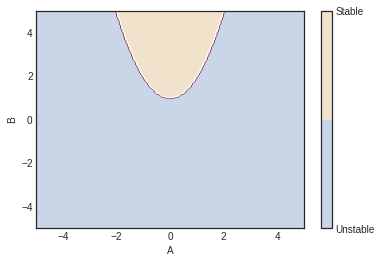

In [22]:
domain = lambda_f(np.complex64(A_val) , np.complex64(B_val))
stable = np.real(domain).copy()
stable[stable < 0] = -1
stable[stable > 0] = 0
plt.style.use('seaborn-white')

plt.contour(A_val, B_val, stable, cmap = 'RdGy',
            levels=[-1,-.5,0], origin='lower')

plt.contourf(A_val, B_val, stable, cmap = 'Pastel2',
            levels=[-1,-.5,0], origin='lower')


#plt.contourf(A_val, B_val, stable, cmap = 'Pastel1')
#plt.imshow(stable, extent=[-5, 5, -5, 5],
#           cmap='RdGy', alpha=0.5)
#plt.contourf(A_val, B_val, stable, cmap = 'Pastel1')
plt.xlabel("A")
plt.ylabel("B")
cbar = plt.colorbar()
cbar.set_ticks([-1, 0])
cbar.set_ticklabels(['Unstable', 'Stable'])
#cbar.set_label('Color Intensity')

plt.grid()
plt.show()

#### Including the diffusion, we find the eigen-values $\lambda_1(k)$ and $\lambda_2(k)$ from

<center>$J_2 = J - D$</center>

In [14]:
J_2 = J - Matrix([[D_u*k**2, 0], [0, D_v*k**2]])
hprint("J_2=", J_2)

<IPython.core.display.Latex object>

In [15]:
lambda_k_1, lambda_k_2 =  list(J_2.eigenvals().keys())
hprint("\lambda_1(k) = ", lambda_k_1)
hprint("\lambda_2(k) = ", lambda_k_2)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [59]:
lambda_k_2.as_ordered_terms()

⎡                              ______________________________________________________________________________________
⎢  2           2        2     ╱  4      2        2     2      2     2      2    2           2           2           2
⎢-A    B  -Dᵤ⋅k    -Dᵥ⋅k    ╲╱  A  - 2⋅A ⋅B - 2⋅A ⋅Dᵤ⋅k  + 2⋅A ⋅Dᵥ⋅k  - 2⋅A  + B  - 2⋅B⋅Dᵤ⋅k  + 2⋅B⋅Dᵥ⋅k  - 2⋅B + Dᵤ 
⎢────, ─, ───────, ───────, ─────────────────────────────────────────────────────────────────────────────────────────
⎣ 2    2     2        2                                                                          2                   

__________________________________________________      ⎤
  4            4         2     2  4         2           ⎥
⋅k  - 2⋅Dᵤ⋅Dᵥ⋅k  + 2⋅Dᵤ⋅k  + Dᵥ ⋅k  - 2⋅Dᵥ⋅k  + 1       ⎥
──────────────────────────────────────────────────, -1/2⎥
                                                        ⎦

In [63]:
t1, t2, t3, t4, t5, t6 = lambda_k_2.as_ordered_terms()
lambda_star = t1+t2+t6
display(lambda_star)
lambda_k_22 = lambda_star + t3 + t4 + t5
lambda_k_22

   2        
  A    B   1
- ── + ─ - ─
  2    2   2

                              _______________________________________________________________________________________
   2           2       2     ╱  4      2        2     2      2     2      2    2           2           2           2 
  A    B   Dᵤ⋅k    Dᵥ⋅k    ╲╱  A  - 2⋅A ⋅B - 2⋅A ⋅Dᵤ⋅k  + 2⋅A ⋅Dᵥ⋅k  - 2⋅A  + B  - 2⋅B⋅Dᵤ⋅k  + 2⋅B⋅Dᵥ⋅k  - 2⋅B + Dᵤ ⋅
- ── + ─ - ───── - ───── + ──────────────────────────────────────────────────────────────────────────────────────────
  2    2     2       2                                                                          2                    

_________________________________________________    
 4            4         2     2  4         2         
k  - 2⋅Dᵤ⋅Dᵥ⋅k  + 2⋅Dᵤ⋅k  + Dᵥ ⋅k  - 2⋅Dᵥ⋅k  + 1    1
───────────────────────────────────────────────── - ─
                                                    2

#### Plot the wave-numbers envelope

/usr/local/anaconda3/envs/sympy/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/anaconda3/envs/sympy/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


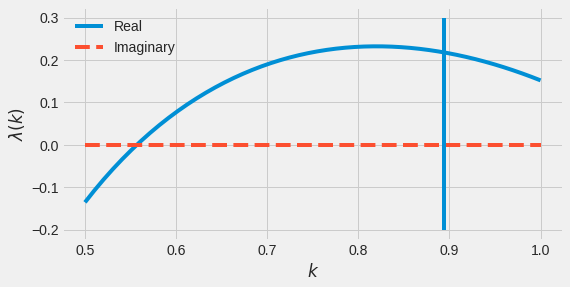

In [70]:
lambda_k_2_f = lambdify([k, A, B, D_u, D_v],lambda_k_2, modules='numpy')

ks = np.complex64(np.linspace(0.5, 1, num=50))

k_c_2 = ((B - 1) * D_v - A**2 * D_u)/(2 * D_u * D_v)
k_c_2_f = lambdify([A, B, D_u, D_v], k_c_2, modules='numpy')

fig = plt.figure(figsize=(8,4))
plt.style.use('fivethirtyeight')
plt.plot(ks, np.real(lambda_k_2_f(ks, A = 2, B = 3, D_u = 1, D_v = 10)), label='Real')
plt.plot(ks, np.imag(lambda_k_2_f(ks, A = 2, B = 3, D_u = 1, D_v = 10)), '--', label='Imaginary')

plt.vlines(np.sqrt(k_c_2_f(A = 2, B = 3, D_u = 1, D_v = 10)), -.2 , .3)
plt.xlabel(r"$k$")
plt.ylabel(r"$\lambda(k)$")
plt.legend()
#plt.grid()
plt.show()

#### Finding the maximum of $\lambda_2(k)$, namely $k_c$ as the dominant wave-number

In [45]:
solveset(lambda_k_2.diff(k), k)

⎧          ___________________________________________________________________________________________        _______
⎪         ╱      2                   _________          _________                                            ╱      2
⎪        ╱      A ⋅Dᵤ⋅Dᵥ      A⋅Dᵤ⋅╲╱ B⋅Dᵤ⋅Dᵥ    A⋅Dᵥ⋅╲╱ B⋅Dᵤ⋅Dᵥ        B⋅Dᵤ⋅Dᵥ            Dᵤ⋅Dᵥ            ╱      A 
⎨0, -   ╱   ─────────────── - ──────────────── - ──────────────── + ─────────────── - ─────────────── ,    ╱   ──────
⎪      ╱      2           2     2           2      2           2      2           2     2           2     ╱      2   
⎪    ╲╱     Dᵤ ⋅Dᵥ - Dᵤ⋅Dᵥ    Dᵤ ⋅Dᵥ - Dᵤ⋅Dᵥ     Dᵤ ⋅Dᵥ - Dᵤ⋅Dᵥ     Dᵤ ⋅Dᵥ - Dᵤ⋅Dᵥ    Dᵤ ⋅Dᵥ - Dᵤ⋅Dᵥ    ╲╱     Dᵤ ⋅Dᵥ
⎩                                                                                                                    

____________________________________________________________________________________         ________________________
                   _________          _________        

In [52]:
lambda_k_2.diff(k)#.subs(k, sqrt( ((B-1)*D_v - A**2 * D_u)/(2*D_u*D_v) ))

                                          2           2                                  2  3            3           
                                     - 2⋅A ⋅Dᵤ⋅k + 2⋅A ⋅Dᵥ⋅k - 2⋅B⋅Dᵤ⋅k + 2⋅B⋅Dᵥ⋅k + 2⋅Dᵤ ⋅k  - 4⋅Dᵤ⋅Dᵥ⋅k  + 2⋅Dᵤ⋅k +
-Dᵤ⋅k - Dᵥ⋅k + ──────────────────────────────────────────────────────────────────────────────────────────────────────
                    _________________________________________________________________________________________________
                   ╱  4      2        2     2      2     2      2    2           2           2           2  4        
               2⋅╲╱  A  - 2⋅A ⋅B - 2⋅A ⋅Dᵤ⋅k  + 2⋅A ⋅Dᵥ⋅k  - 2⋅A  + B  - 2⋅B⋅Dᵤ⋅k  + 2⋅B⋅Dᵥ⋅k  - 2⋅B + Dᵤ ⋅k  - 2⋅Dᵤ⋅

     2  3                              
 2⋅Dᵥ ⋅k  - 2⋅Dᵥ⋅k                     
───────────────────────────────────────
_______________________________________
    4         2     2  4         2     
Dᵥ⋅k  + 2⋅Dᵤ⋅k  + Dᵥ ⋅k  - 2⋅Dᵥ⋅k  + 1 